In [1]:
%%capture
!pip install num
!pip install librosa
!pip install matplotlib

!pip install scikit-image
!pip install opencv-python

In [2]:
import numpy
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

import skimage.io
import cv2

In [32]:
## Test Sound
scale_file = "data/train_audio/ashdro1/XC114605.ogg"
ipd.Audio(scale_file)

In [33]:
# load audio files with librosa
scale, sample_rate = librosa.load(scale_file, duration=10)

In [34]:
# n_fft: frame rate, sr: sampleing rate, n_mels: number of mel bands
filter_banks = librosa.filters.mel(n_fft=2048, sr=sample_rate, n_mels=10, fmin=1000, fmax=8000, htk=True)
filter_banks.shape

(10, 1025)

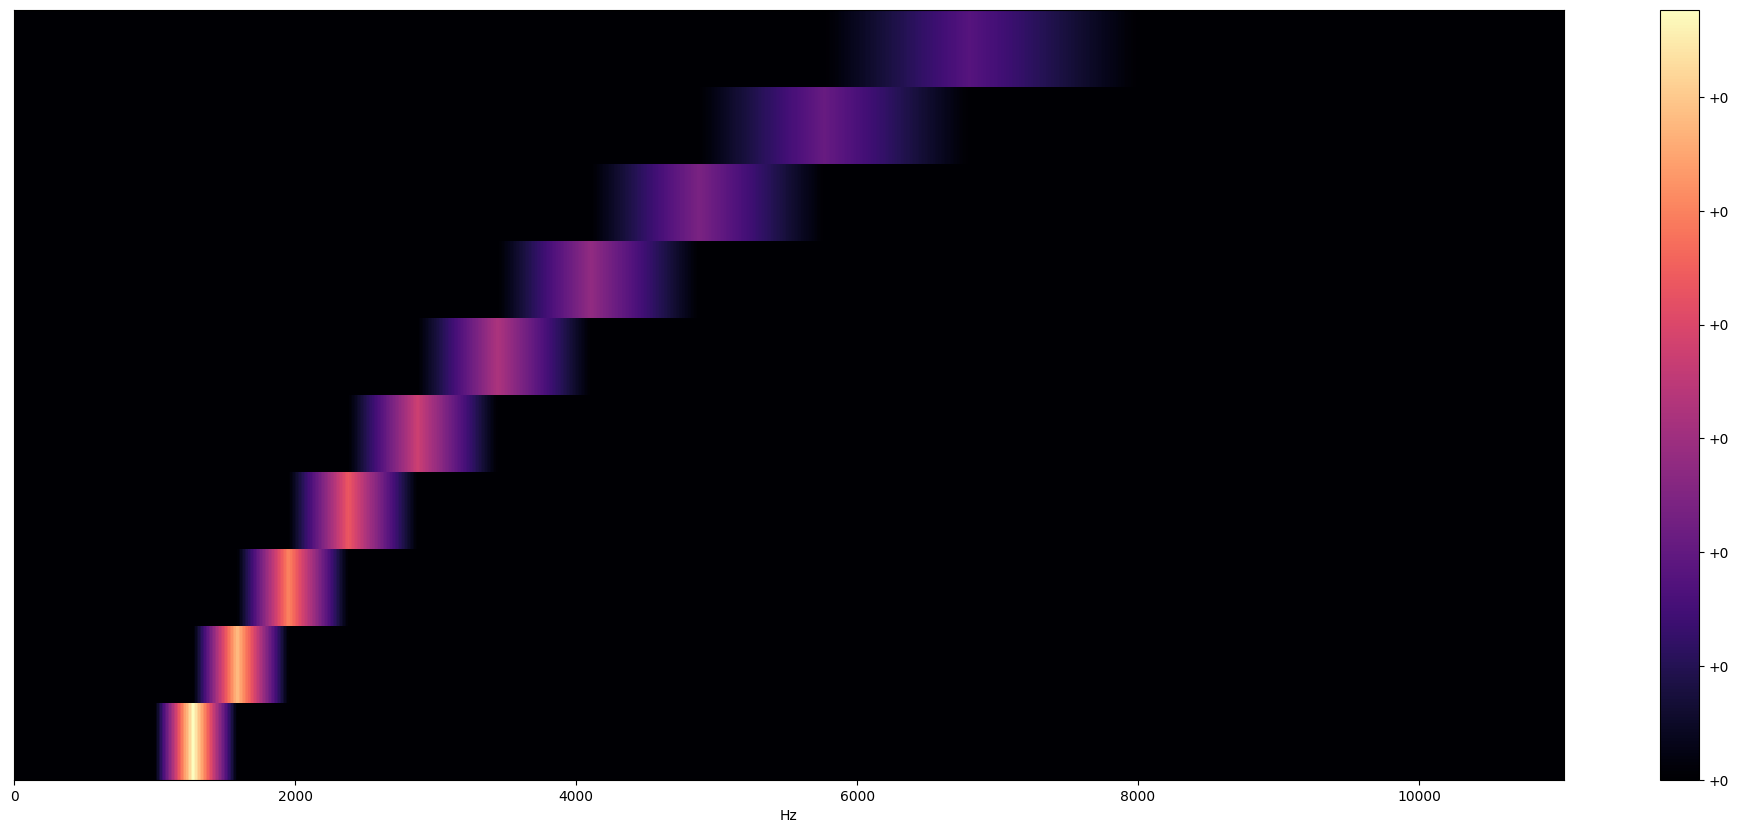

In [35]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks, sr=sample_rate, x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [36]:
mel_spectrogram = librosa.feature.melspectrogram(y=scale, n_fft=2048, sr=sample_rate, n_mels=10, hop_length=1024, fmin=1000, fmax=sample_rate/2, htk=True)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram**3, ref=numpy.max)

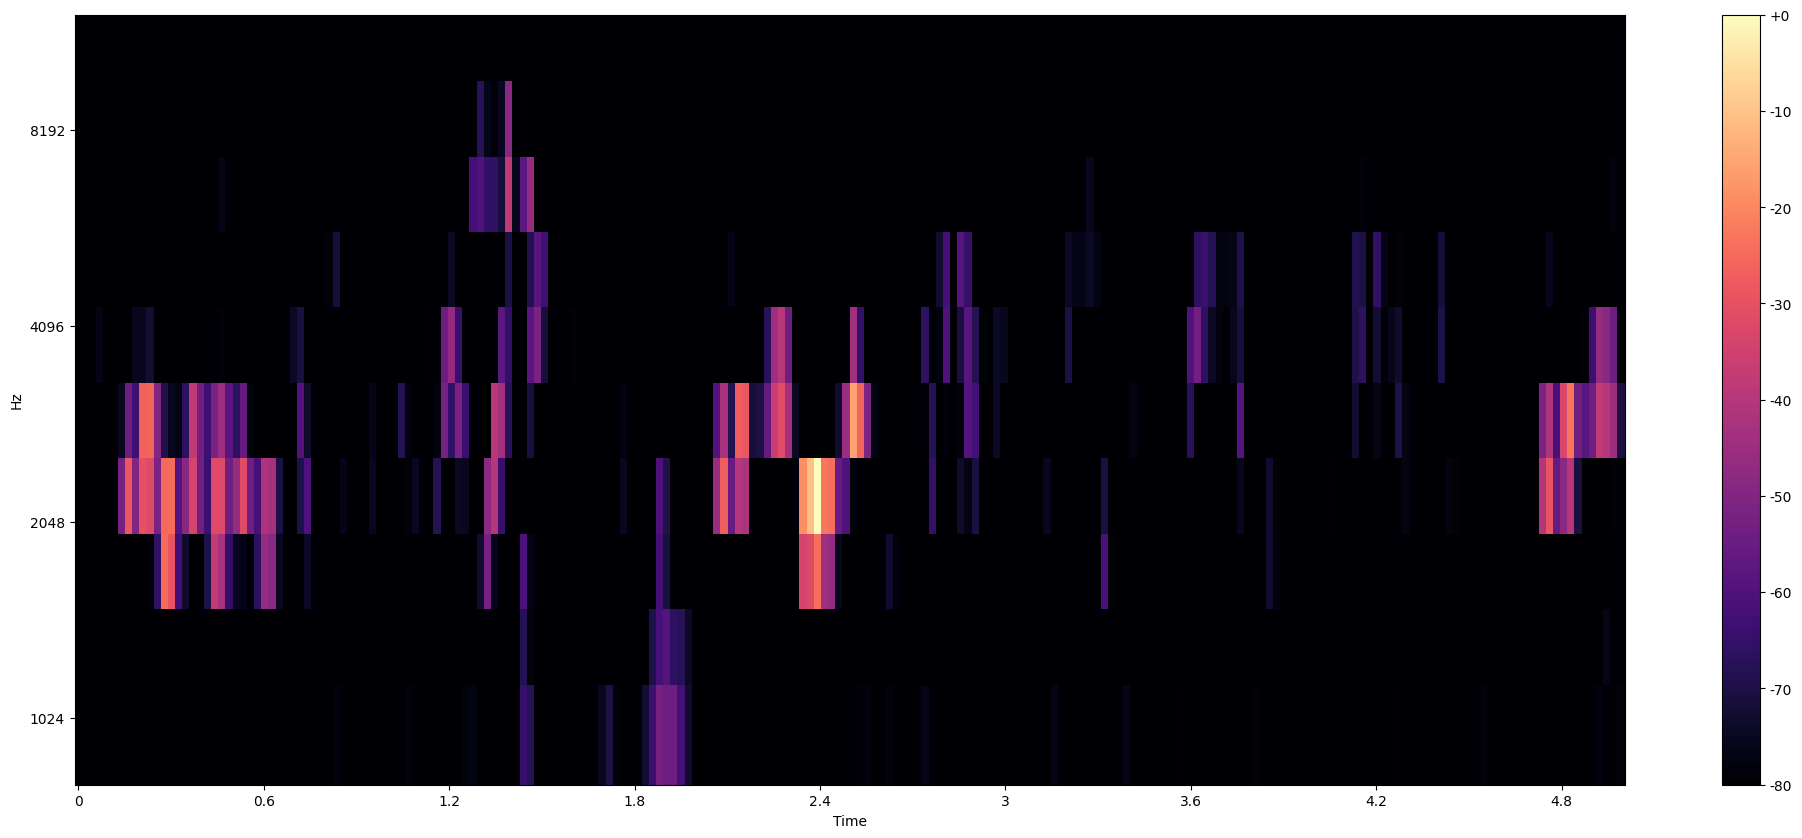

[[176 176 176 ... 177 177 178]
 [176 176 176 ... 177 177 178]
 [176 176 176 ... 177 177 178]
 ...
 [176 176 176 ... 176 176 176]
 [176 176 176 ... 176 176 176]
 [176 176 176 ... 176 176 176]]


In [37]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", fmin=1000, sr=sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

res = cv2.resize(log_mel_spectrogram, dsize=(255, 255), interpolation=cv2.INTER_AREA)
print(res.astype(numpy.uint8))
skimage.io.imsave("test.png", res.astype(numpy.uint8))
